# Package 및 감잡기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('dataset/train.csv',  index_col = 0)
test = pd.read_csv('dataset/test.csv', index_col = 0)
train.shape, test.shape

((1253, 9), (2924, 8))

- 훈련 데이터가 굉장히 적음
- 딥러닝은 효과적이지 못함
- 전통적인 기법 사용해야할 것 같음(Regression)
- LR, DT, RF, SVM정도

In [2]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
id,,,,,,,,,
1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [3]:
# Data feature 확인
print('Gender:',train['Gender'].unique())

train.describe()

Gender: ['M' 'I' 'F']


,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


1. train.csv : 학습 데이터
- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Target : 전복 나이


2. test.csv : 테스트 데이터
- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole : Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게


# Target 

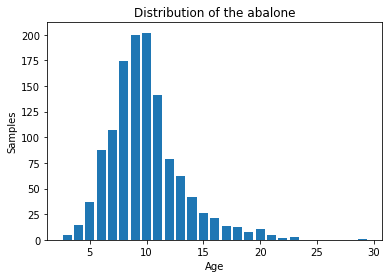

Mean:9.9122, std:3.2147


In [4]:
# 나이 비율 확인
x = train['Target'].value_counts()
plt.bar(x.keys(), x.values)
plt.title("Distribution of the abalone")
plt.xlabel("Age")
plt.ylabel("Samples")
plt.show()
print("Mean:{:.4f}, std:{:.4f}".format(train['Target'].mean(), train['Target'].std()))

# Data
- Gender만 categorical 나머지는 numerical data
- 결측치는 없으므로 따로 처리 필요 없음

In [5]:
# 각 feature type 확인
train.dtypes

Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

In [6]:
# 결측치 확인
train.isna().sum()

Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64


## 1. Feature들끼리 관계성 확인
- 변수들간 상호 correlation이 너무 높음
- 변수간 종속성이 너무 높아서 오히려 예측력을 낮출 것 같음
- 상황에 따라서 dimension reduction을 사용해도 괜찮을 것 같음
- pearson만으로 이미 충분히 높은 값들
- pearson은 선형성이므로 PCA 사용해보자(spearman은 비선형관계까지 파악)

Pearson Correlation with Age and Features(numerical)
Lenght            0.543789
Diameter          0.567933
Height            0.604654
Whole Weight      0.538404
Shucked Weight    0.420126
Viscra Weight     0.497283
Shell Weight      0.625819
Name: Target, dtype: float64


Spearman Correlation with Age and Features(numerical)
Lenght            0.591823
Diameter          0.614044
Height            0.651456
Whole Weight      0.621544
Shucked Weight    0.531630
Viscra Weight     0.605002
Shell Weight      0.683134
Name: Target, dtype: float64


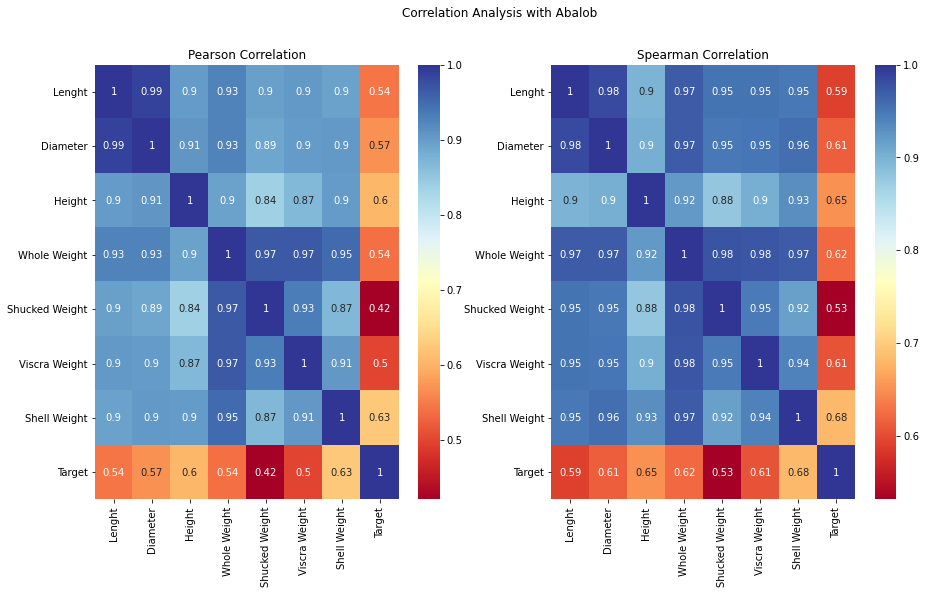

In [7]:
# 나이와 다른 feature들과의 상관관계 파악하기 
fig, axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("Correlation Analysis with Abalob")
corr = train.corr(method='pearson')
corr_ = corr['Target'][:-1]
print('Pearson Correlation with Age and Features(numerical)')
print(corr_)
axes[0].set_title('Pearson Correlation')
sns.heatmap(corr, annot=True, cmap='RdYlBu', ax = axes[0])

corr = train.corr(method='spearman')
corr_ = corr['Target'][:-1]
print('\n\nSpearman Correlation with Age and Features(numerical)')
print(corr_)
axes[1].set_title('Spearman Correlation')
sns.heatmap(corr, annot=True, cmap='RdYlBu', ax = axes[1])

plt.show()
plt.close()


## 2. Feature 별 살펴보기
### 2-1. Categorical(Sex)
- 성별에 따라 평균 나이가 지나면 빠르게 죽는 것으로 예상됨
- 나이 예측에 중요한 특징으로 작용할 수 있을 것 같음
- (대충 평균으로 예측하면 성능이 보장 -> 이게 과하면 문제가 될수도 있을듯)


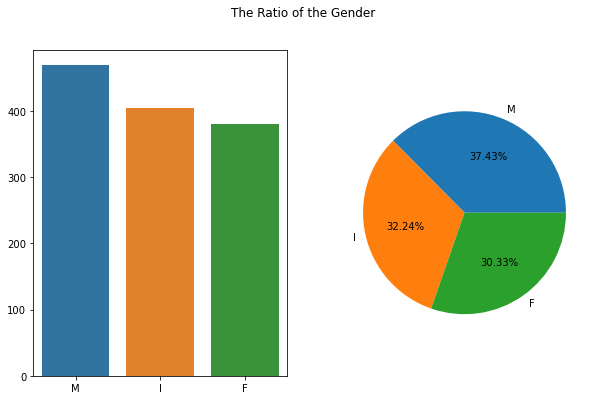

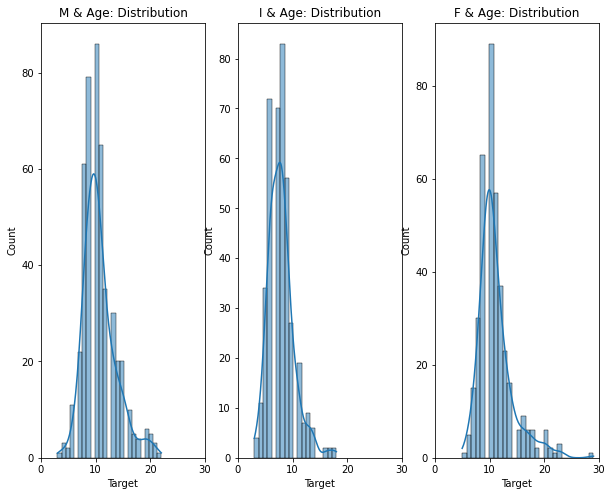

In [8]:
# 1. 성별(categorical)
fig, axes = plt.subplots(1,2,figsize=(10,6))
x = train['Gender'].value_counts()
fig.suptitle("The Ratio of the Gender")
sns.barplot(x=x.keys(), y=x.values, ax=axes[0])
axes[1].pie(x=x.values, labels=x.keys(),autopct='%2.2f%%')
plt.show()
plt.close()
# 2. 각 성별별로 나이의 분포
fig, axes = plt.subplots(1,3, figsize=(10,8))
for i, sex in enumerate(['M', 'I', 'F']):
    x = train[train['Gender']==sex]['Target']
    axes[i].set_title(f'{sex} & Age: Distribution' )
    axes[i].set_xlim(0,30)
    sns.histplot(x, kde=True, ax=axes[i])
plt.show()
plt.close()

### 2-2. Numerical features
- Whole Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게


> Normalize 후에도 분포의 형태와 범위 매우 비슷
- 이들을 한번에 묶어주는 변수를 만들어주면 좋을 듯(PCA)
- 굳이 이상치 처리를 할 필요는 없어 보임

In [9]:
# 수치형 데이터 리스트
numerical_features = [x for x in train.keys() if x not in ['Gender','Target']]

Lenght
IQR: 0.16999999999999998
Lower bound is 0.1900, count:8
Upper bound is 0.7000, count:47

Lenght
IQR: 0.16999999999999998
Lower bound is 0.1900, count:8
Upper bound is 0.7000, count:47

Lenght
IQR: 0.16999999999999998
Lower bound is 0.1900, count:8
Upper bound is 0.7000, count:47

Lenght
IQR: 0.16999999999999998
Lower bound is 0.1900, count:8
Upper bound is 0.7000, count:47

Lenght
IQR: 0.16999999999999998
Lower bound is 0.1900, count:8
Upper bound is 0.7000, count:47

Lenght
IQR: 0.16999999999999998
Lower bound is 0.1900, count:8
Upper bound is 0.7000, count:47

Lenght
IQR: 0.16999999999999998
Lower bound is 0.1900, count:8
Upper bound is 0.7000, count:47



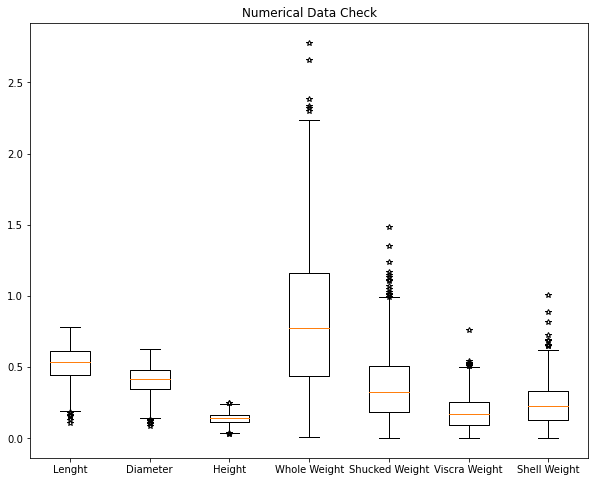

In [11]:
# 이상치 확인 -> boxplot, violin
def IQR(data):
    # 4분위수
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3-q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q1 + (iqr*1.5)
    
    # 1/4이하, 3/4이상
    lower, upper = (data<lower_bound), (data>upper_bound)
    print(data.name)
    print('IQR:',iqr)
    print('Lower bound is {:.4f}, count:{}'.format(lower_bound, lower.sum()))
    print('Upper bound is {:.4f}, count:{}'.format(upper_bound, upper.sum()))
    print()
for i in range(7):
    row, col = i//3, i%3
    feature = numerical_features[i]
    IQR(x)
    

plt.figure(figsize=(10,8))
plt.title("Numerical Data Check")
plt.boxplot([train[feature] for feature in numerical_features], sym="*")
plt.xticks(list(range(1,8)), numerical_features)
plt.show()
plt.close()

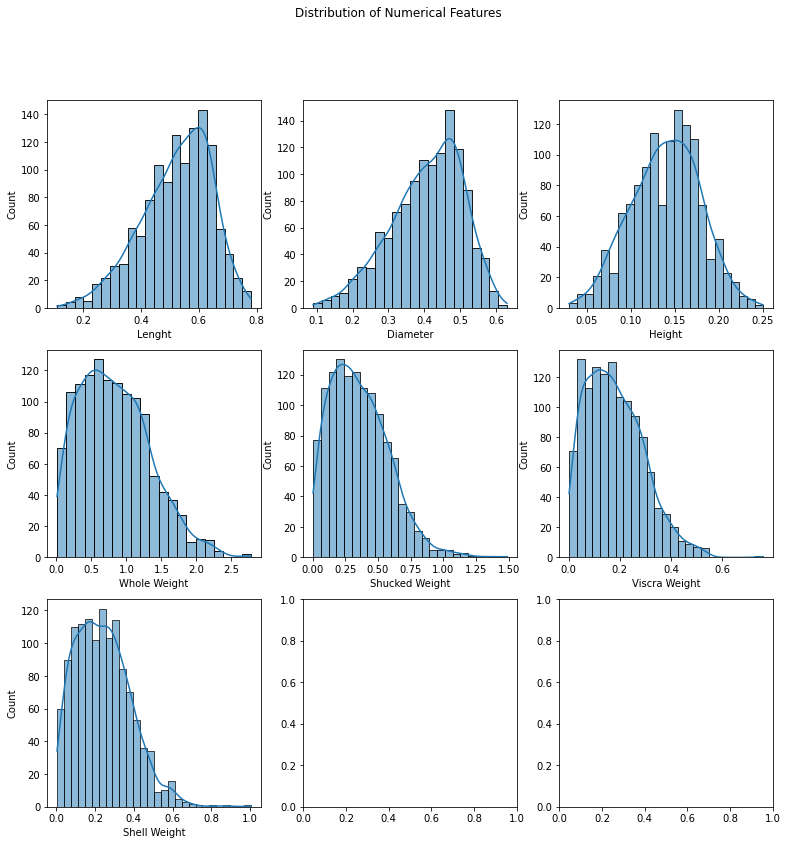

In [12]:
# 분포 확인 -> histplot
fig, axes = plt.subplots(3,3 , figsize=(13,13))
fig.suptitle("Distribution of Numerical Features")
for i in range(7):
    row, col = i//3, i%3
    feature = numerical_features[i]
    x = train[feature]
    ax = axes[row][col]
    sns.histplot(x, kde=True, ax=ax)
    
plt.show()
plt.close()

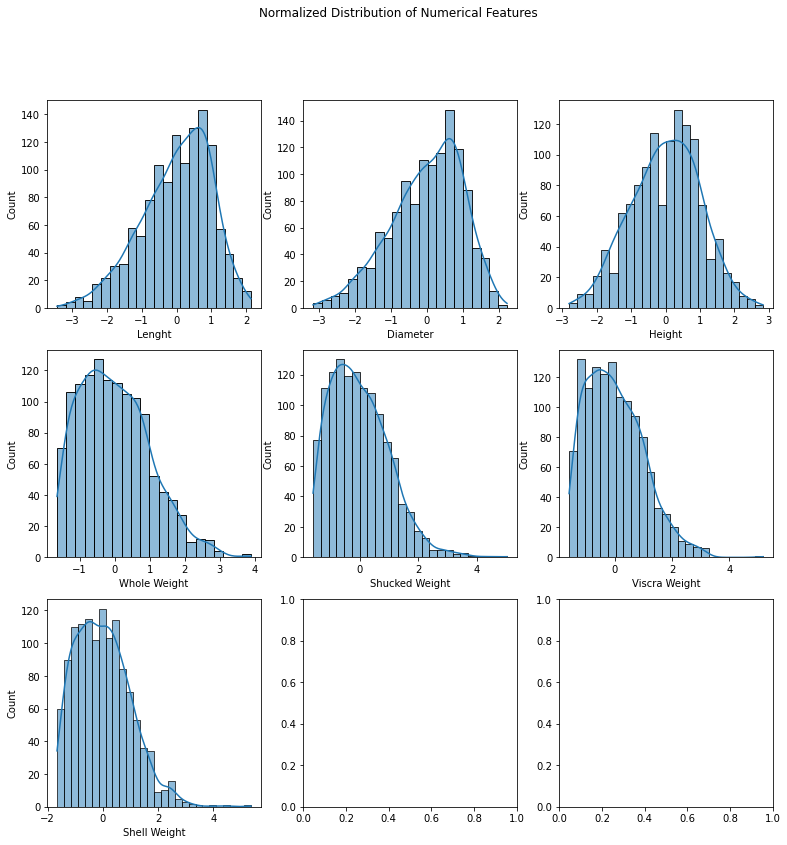

In [13]:
fig, axes = plt.subplots(3,3 , figsize=(13,13))
fig.suptitle("Normalized Distribution of Numerical Features")
for i in range(7):
    row, col = i//3, i%3
    feature = numerical_features[i]
    x = train[feature]
    x = (x-x.mean())/x.std()
    ax = axes[row][col]
    sns.histplot(x, kde=True, ax=ax)
    
plt.show()
plt.close()